## 5300 Final: Orbits

In [58]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [59]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [60]:
class GravOrbit():
    """
    This class implements the lagrangian equations and parameters for two objects orbiting under gravitational 
    attraction.
    
    Parameters
    ----------
    G : float
        gravitational constant
    m1 : float
        mass of the first particle
    m2 : float
        mass of the second particle
        
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1., G=1.):
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            8-component vector with 
                z[0] = x_1(t) and z[1] = x_dot_1(t)
                z[2] = y_1(t) and z[3] = y_dot_1(t)
                z[4] = x_2(t) and z[5] = x_dot_2(t)
                z[6] = y_2(t) and z[7] = y_dot_2(t)
                
        Returns
        -------
        
        """
        
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2 )
        return [ \
                z[1], self.G * self.m2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m1 * (z[6] - z[2]) / r_12**3, \
               ]
    
    
    def solve_ode(self, t_pts, z_0, 
                 abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]),
                             z_0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2    

In [61]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line


In [62]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Orbit Plots

In [63]:
# Labels for individual plot axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 5.
G = 1.

# Instantiate orbit
o1 = GravOrbit(m1, m2, G)

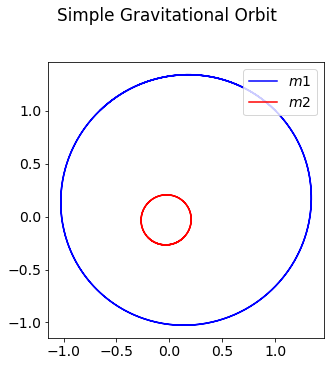

In [64]:
#Initial Conditions with com velocity of zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m1/m2) * x_1_0, -(m1/m2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode(t_pts, z_0)



# start the plot!
fig = plt.figure(figsize=(5,5))
overall_title = 'Simple Gravitational Orbit'
fig.suptitle(overall_title, va='baseline')
    
ax = fig.add_subplot(1,1,1)       

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x_1, y_1, color='blue', label=r'$m1$')
ax.plot(x_2, y_2, color='red', label=r'$m2$')
ax.legend()
ax.legend(loc='upper right')
ax.set_aspect(1)

fig.tight_layout()

## Orbit Plot: m1 >> m2

In [65]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 20.
delta_t = 0.00001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 20.
m2 = 1.
G = 20.

# Instantiate orbit
o2 = GravOrbit(m1, m2, G)

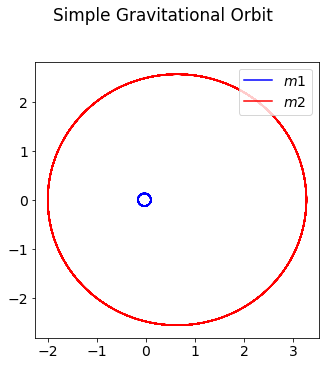

In [66]:
#Initial Conditions with com velocity of zero
x_1_0, x_dot_1_0 = 0.1, 0.
y_1_0, y_dot_1_0 = 0., 0.75
x_2_0, x_dot_2_0 = -(m1/m2) * x_1_0, -(m1/m2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o2.solve_ode(t_pts, z_0)



# start the plot!
fig = plt.figure(figsize=(5,5))
overall_title = 'Simple Gravitational Orbit'
fig.suptitle(overall_title, va='baseline')
    
ax = fig.add_subplot(1,1,1)       

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x_1, y_1, color='blue', label=r'$m1$')
ax.plot(x_2, y_2, color='red', label=r'$m2$')
ax.legend()
ax.legend(loc='upper right')
ax.set_aspect(1)

fig.tight_layout()